In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [7]:
# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format= 'retina'

# 그래프에 retina display 적용
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats("retina")

In [8]:
df = pd.read_csv("data/Pokemon2.csv", index_col=0)
df.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
# 예측에 필요 없을 것 같은 데이터 삭제
remove_col = ['Name','Total']

In [10]:
df = df.drop(columns=remove_col)
df

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,
1,Grass,Poison,45,49,49,65,65,45,1,False
2,Grass,Poison,60,62,63,80,80,60,1,False
3,Grass,Poison,80,82,83,100,100,80,1,False
3,Grass,Poison,80,100,123,122,120,80,1,False
4,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...
719,Rock,Fairy,50,100,150,100,150,50,6,True
719,Rock,Fairy,50,160,110,160,110,110,6,True
720,Psychic,Ghost,80,110,60,150,130,70,6,True


In [11]:
df.info()
# Type 2에 결측치 존재

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Type 1      800 non-null    object
 1   Type 2      414 non-null    object
 2   HP          800 non-null    int64 
 3   Attack      800 non-null    int64 
 4   Defense     800 non-null    int64 
 5   Sp. Atk     800 non-null    int64 
 6   Sp. Def     800 non-null    int64 
 7   Speed       800 non-null    int64 
 8   Generation  800 non-null    int64 
 9   Legendary   800 non-null    bool  
dtypes: bool(1), int64(7), object(2)
memory usage: 63.3+ KB


In [12]:
df.nunique()

Type 1         18
Type 2         18
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

In [13]:
df.isnull().sum()

Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [14]:
df['Type 2'].fillna('N/A', inplace=True)

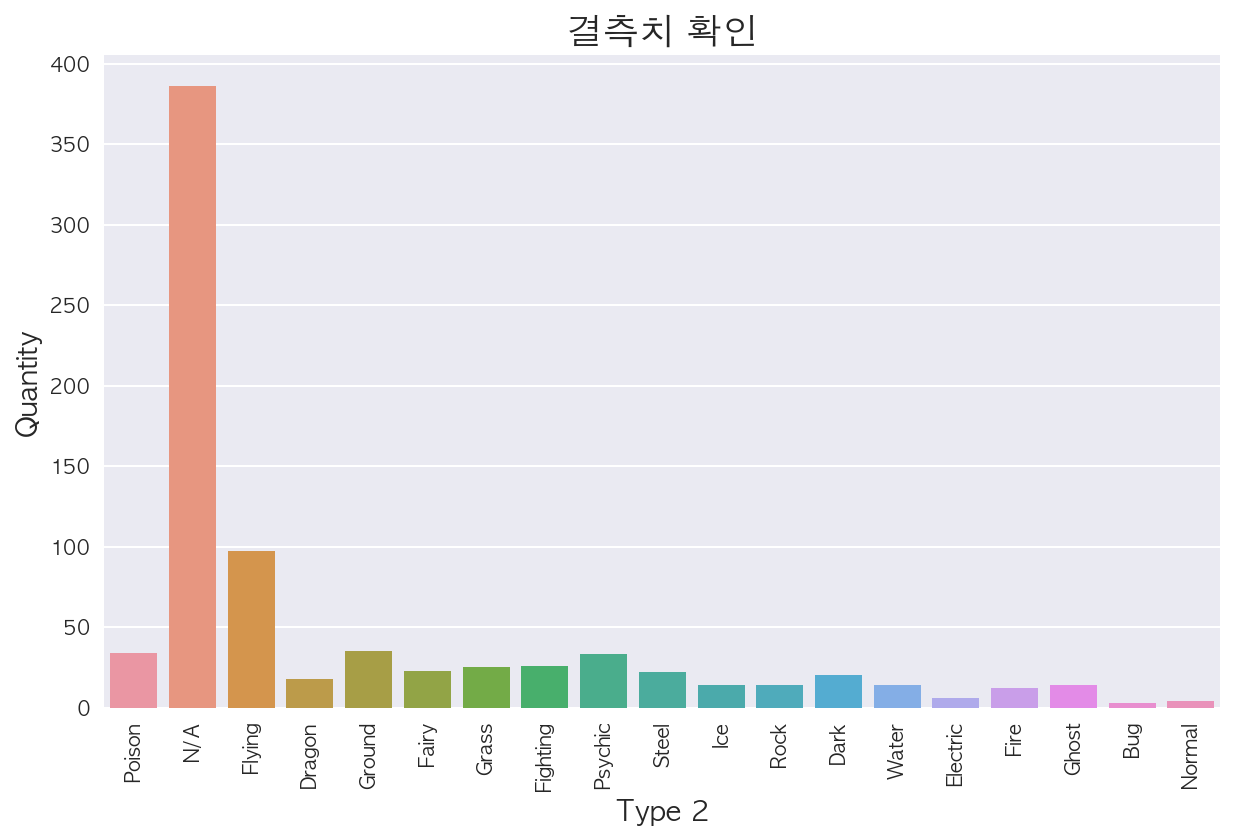

In [15]:
# 결측치 확인

plt.figure(figsize=(10,6))
sns.countplot(x='Type 2', data=df)
plt.title('결측치 확인', size=18)
plt.xlabel('Type 2', size=14)
plt.ylabel('Quantity', size=14)
plt.xticks(rotation=90)
plt.show()

In [16]:
# def TF(x):
#     if x == 0:
#         return 0
#     else:
#         return 1
    
# df['Legendary'] = df['Legendary'].map(TF)
# df['Legendary']

df['Legendary']=df['Legendary'].astype(int)

In [17]:
df['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

In [18]:
# 전설의 포켓몬 일수록 확실히 능력치가 좋음
df.groupby('Legendary')[['Attack', 'Defense']].mean()

,Attack,Defense
Legendary,,
0,75.669388,71.559184
1,116.676923,99.661538


In [19]:
# 최빈값
df['Type 2'].mode()[0] 

'N/A'

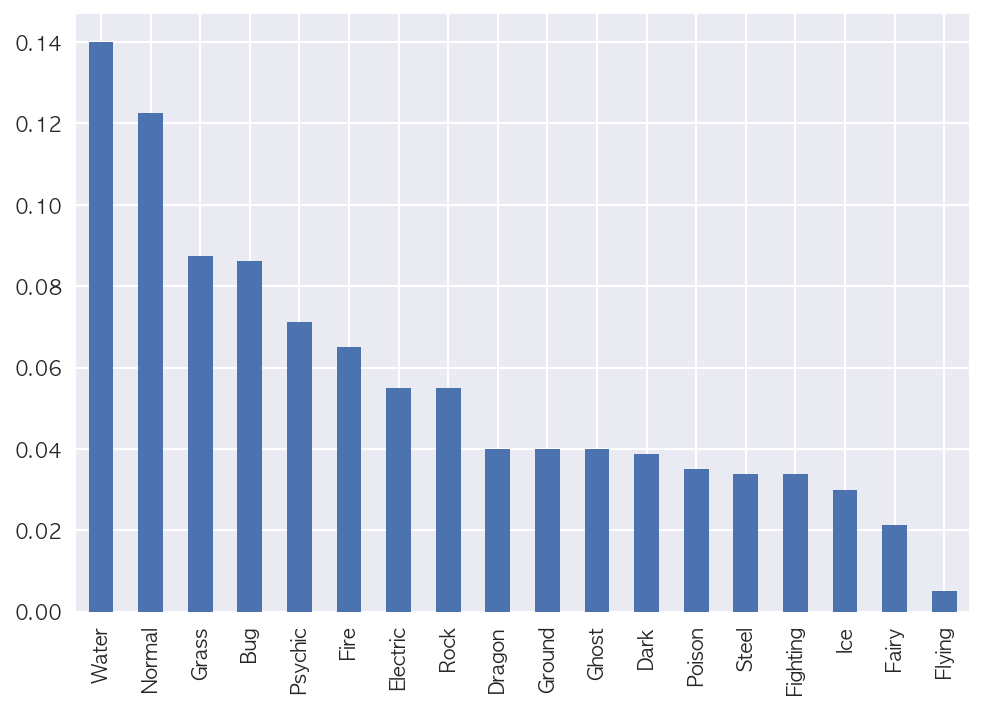

In [20]:
df['Type 1'].value_counts(normalize=True).plot.bar()
plt.show()

In [21]:
df.dropna()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,
1,Grass,Poison,45,49,49,65,65,45,1,0
2,Grass,Poison,60,62,63,80,80,60,1,0
3,Grass,Poison,80,82,83,100,100,80,1,0
3,Grass,Poison,80,100,123,122,120,80,1,0
4,Fire,N/A,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
719,Rock,Fairy,50,100,150,100,150,50,6,1
719,Rock,Fairy,50,160,110,160,110,110,6,1
720,Psychic,Ghost,80,110,60,150,130,70,6,1


In [22]:
# 최빈값으로 Type 2 채움
# df['Type 2'].fillna(df['Type 2'].mode()[0], inplace=True)

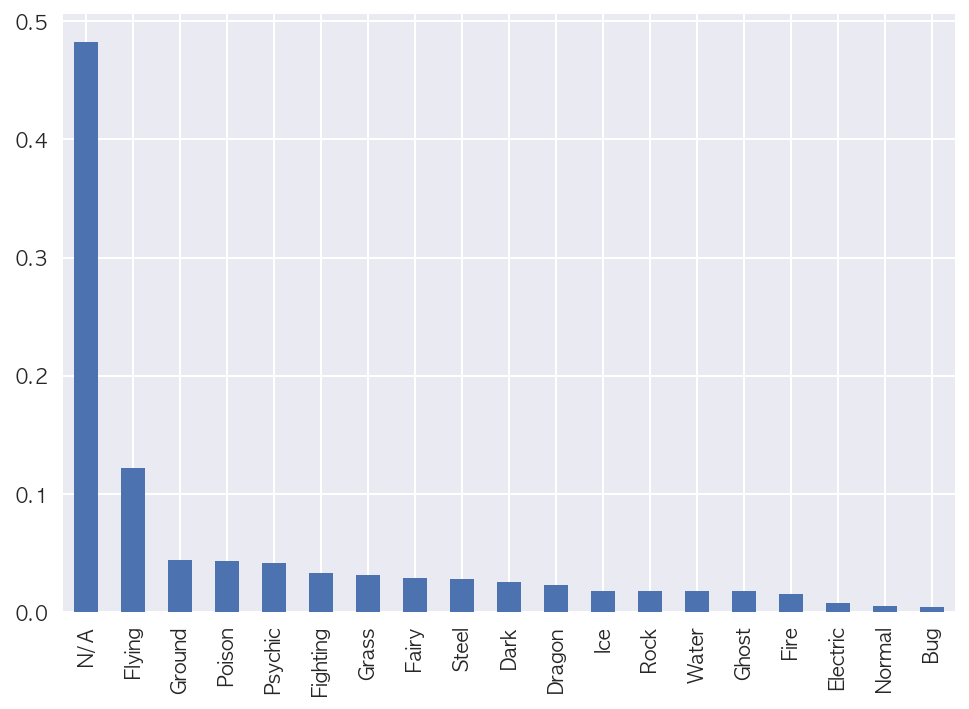

In [23]:
df['Type 2'].value_counts(normalize=True).plot.bar()
plt.show()

In [24]:
df

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,
1,Grass,Poison,45,49,49,65,65,45,1,0
2,Grass,Poison,60,62,63,80,80,60,1,0
3,Grass,Poison,80,82,83,100,100,80,1,0
3,Grass,Poison,80,100,123,122,120,80,1,0
4,Fire,N/A,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
719,Rock,Fairy,50,100,150,100,150,50,6,1
719,Rock,Fairy,50,160,110,160,110,110,6,1
720,Psychic,Ghost,80,110,60,150,130,70,6,1


In [25]:
df['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [26]:
df['Type 2'].value_counts()

N/A         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Ice          14
Rock         14
Water        14
Ghost        14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64

In [27]:
# from sklearn.preprocessing import LabelEncoder

# LEdf = pd.DataFrame()

# le = LabelEncoder()
# le.fit(df['Type 1'])
# LEdf['Type 1'] = le.transform(df['Type 1'])
    
# LEdf

In [28]:
# LEdf.value_counts()

In [29]:
# 직접 인코딩 --> LabelEncoder 로 했을때와 차이는 없었음..

cnt = 10
for i in df['Type 1'].value_counts().to_dict().keys():
    df['Type 1'] = df['Type 1'].replace(i, cnt)
    cnt += 1


cnt2 = 30
for j in df['Type 2'].value_counts().to_dict().keys():
    df['Type 2'] = df['Type 2'].replace(j, cnt2)
    cnt2 += 1

In [30]:
# 인코딩 확인
df[['Type 1', 'Type 2']].head()

,Type 1,Type 2
#,,
1,12,33
2,12,33
3,12,33
3,12,33
4,15,30


In [31]:
# from sklearn.preprocessing import LabelEncoder

# LEdf2 = pd.DataFrame()

# le = LabelEncoder()
# le.fit(df['Type 2'])
# LEdf2['Type 2'] = le.transform(df['Type 2'])
    
# LEdf2

In [32]:
# LEdf2.value_counts()

In [33]:
df['Type 1'].value_counts()

10    112
11     98
12     70
13     69
14     57
15     52
16     44
17     44
18     32
19     32
20     32
21     31
22     28
23     27
24     27
25     24
26     17
27      4
Name: Type 1, dtype: int64

In [34]:
df['Type 2'].value_counts()

30    386
31     97
32     35
33     34
34     33
35     26
36     25
37     23
38     22
39     20
40     18
41     14
42     14
43     14
44     14
45     12
46      6
47      4
48      3
Name: Type 2, dtype: int64

In [35]:
# LEdf

In [36]:
# df['Type 1'] = LEdf
# df['Type 2'] = LEdf2

In [45]:
df

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,
1,12,33,45,49,49,65,65,45,1,0
2,12,33,60,62,63,80,80,60,1,0
3,12,33,80,82,83,100,100,80,1,0
3,12,33,80,100,123,122,120,80,1,0
4,15,30,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
719,17,37,50,100,150,100,150,50,6,1
719,17,37,50,160,110,160,110,110,6,1
720,14,44,80,110,60,150,130,70,6,1


In [46]:
file_name = 'Pokemon_preprocessing.csv'

In [47]:
df.to_csv(file_name, index=False)

In [48]:
pd.read_csv(file_name)

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,12,33,45,49,49,65,65,45,1,0
1,12,33,60,62,63,80,80,60,1,0
2,12,33,80,82,83,100,100,80,1,0
3,12,33,80,100,123,122,120,80,1,0
4,15,30,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
795,17,37,50,100,150,100,150,50,6,1
796,17,37,50,160,110,160,110,110,6,1
797,14,44,80,110,60,150,130,70,6,1
798,14,39,80,160,60,170,130,80,6,1


In [49]:
label_name = ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Legendary']

In [50]:
# feature_names = df.columns.tolist()
# for i in label_name:
#     feature_names.remove(i)
feature_names = ['Type 1', 'Type 2', 'Speed', 'Generation']
feature_names

['Type 1', 'Type 2', 'Speed', 'Generation']

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[feature_names], df[label_name], random_state=42)

In [52]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((600, 4), (200, 4), (600, 6), (200, 6))

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
y_pred = knn.predict(X_test)
y_pred

array([[ 70,  90, 110,  60,  75,   0],
       [ 70,  80, 102,  80, 102,   0],
       [ 20,  40,  15,  35,  35,   0],
       ...,
       [ 45,  50,  55,  75,  65,   0],
       [ 95, 124,  78,  69,  71,   0],
       [ 45,  50,  43,  40,  38,   0]])

In [56]:
(y_pred == y_test).mean()

HP           0.130
Attack       0.060
Defense      0.080
Sp. Atk      0.060
Sp. Def      0.065
Legendary    0.870
dtype: float64

In [57]:
# 결정트리

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 10,
                               max_features= 0.75,
                               random_state = 42)
model

DecisionTreeClassifier(max_depth=10, max_features=0.75, random_state=42)

In [58]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.75, random_state=42)

In [59]:
# 트리 시각화 
# from sklearn.tree import plot_tree

# plt.figure(figsize=(100, 150))
# plot_tree(model, filled=True, fontsize=18, feature_names=feature_names)
# plt.show()

In [60]:
y_predict = model.predict(X_test)
y_predict

array([[ 90, 120, 100, 150, 120,   1],
       [ 45,  30,  45,  70,  45,   0],
       [ 45,  30,  45,  70,  45,   0],
       ...,
       [ 60,  25,  55,  60,  55,   0],
       [ 44,  66,  70,  44,  55,   0],
       [ 45,  30,  45,  70,  45,   0]])

In [61]:
(y_test == y_predict).mean()

HP           0.135
Attack       0.090
Defense      0.095
Sp. Atk      0.070
Sp. Def      0.065
Legendary    0.875
dtype: float64

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict

max_depth_list = [2, 3, 5, 7, 9, 10]
max_features_list = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [63]:
accuracy_list = []
for max_depth in max_depth_list:
    for max_features in max_features_list:
        acc_list = []
        model = DecisionTreeClassifier(max_depth=max_depth,
                                       max_features=max_features,
                                       random_state=42)
        y_predict = cross_val_predict(model, X_train, y_train, cv=3, n_jobs=-1)
        acc = (y_train == y_predict).mean()

        acc_list.append(max_depth)
        acc_list.append(max_features)
        acc_list.append(acc)
        accuracy_list.append(acc_list)

In [64]:
accuracy_list

[[2,
  0.4,
  HP           0.073333
  Attack       0.043333
  Defense      0.038333
  Sp. Atk      0.060000
  Sp. Def      0.045000
  Legendary    0.913333
  dtype: float64],
 [2,
  0.5,
  HP           0.070000
  Attack       0.045000
  Defense      0.048333
  Sp. Atk      0.071667
  Sp. Def      0.045000
  Legendary    0.910000
  dtype: float64],
 [2,
  0.6,
  HP           0.070000
  Attack       0.045000
  Defense      0.048333
  Sp. Atk      0.071667
  Sp. Def      0.045000
  Legendary    0.910000
  dtype: float64],
 [2,
  0.7,
  HP           0.070000
  Attack       0.045000
  Defense      0.048333
  Sp. Atk      0.071667
  Sp. Def      0.045000
  Legendary    0.910000
  dtype: float64],
 [2,
  0.8,
  HP           0.058333
  Attack       0.043333
  Defense      0.050000
  Sp. Atk      0.066667
  Sp. Def      0.048333
  Legendary    0.910000
  dtype: float64],
 [2,
  0.9,
  HP           0.058333
  Attack       0.043333
  Defense      0.050000
  Sp. Atk      0.066667
  Sp. Def      0.

In [65]:
# 회귀 모델로 한다면?

In [67]:
X = train.drop(columns=label_name)
y = train[label_name]

NameError: name 'train' is not defined

In [43]:
# sklearn.model_selection의 train_test_split은 학습 데이터와 검증 데이터를 나눠주는 함수입니다.
from sklearn.model_selection import train_test_split

# 이 때, 학습할 데이터와 테스트할 데이터의 값의 비율은 9대 1로, random_state는 0으로 하겠습니다.
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.9, random_state=0)

NameError: name 'X' is not defined

In [222]:
X_train

,Type 1,Type 2,Speed,Generation
#,,,,
388,12,0.0,36,4
252,12,0.0,70,3
535,10,0.0,64,5
512,12,0.0,101,5
353,20,0.0,45,3
...,...,...,...,...
7,10,0.0,43,1
328,19,0.0,10,3
178,14,50.0,95,2


In [223]:
y_train

,HP,Attack,Defense,Sp. Atk,Sp. Def,Legendary
#,,,,,,
388,75,89,85,55,65,0
252,40,45,35,65,55,0
535,50,50,40,50,40,0
512,75,98,63,98,63,0
353,44,75,35,63,33,0
...,...,...,...,...,...,...
7,44,48,65,50,64,0
328,45,100,45,45,45,0
178,65,75,70,95,70,0


In [224]:
X_valid

,Type 1,Type 2,Speed,Generation
#,,,,
477,20,0.0,45,4
443,18,51.0,42,4
468,26,50.0,80,4
487,20,59.0,90,4
79,10,53.0,15,1
...,...,...,...,...
222,10,63.0,35,2
11,13,0.0,30,1
176,26,50.0,40,2


In [225]:
# sklearn의 linear_model은 선형회귀 모델을 구현한 라이브러리입니다.
from sklearn import linear_model

# 선형회귀 모델 model_lr을 생성합니다.
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [226]:
print("모델 : {}".format(model_lr))
print("학습용 세트 정확도: {:.3f}".format(model_lr.score(X_train, y_train)))
print("검증 세트 정확도: {:.3f}".format(model_lr.score(X_valid, y_valid)))

모델 : LinearRegression()
학습용 세트 정확도: 0.118
검증 세트 정확도: 0.096


In [227]:
# 점수 산출하는 과정을 함수화합니다.
def scoreModel(model, X_train, X_valid, y_train, y_valid):
    '''
        머신러닝 모델과 X_train, X_valid, y_train, y_valid 변수를 받아서
        모델명, 학습용 세트 정확도(R2 score), 테스트 세트 정확도(R2 score)를 출력하는 함수
    '''
    print("모델 : {}".format(model))
    print("학습용 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
    valid_score = model.score(X_valid, y_valid)
    print("검증 세트 정확도: {:.3f}".format(valid_score))
    return valid_score

In [228]:
# sklearn.tree의 DecisionTreeRegressor는 결정 트리 모델을 구현한 라이브러리입니다.
from sklearn.tree import DecisionTreeRegressor

# 결정트리 모델을 생성합니다.
model_dt = DecisionTreeRegressor(max_depth=4, max_features=.9, random_state=42)

In [229]:
# 모델을 학습시킵니다.
model_dt.fit(X_train, y_train)
# 모델에 대한 점수를 산출합니다.
score = scoreModel(model_dt, X_train, X_valid, y_train, y_valid)

모델 : DecisionTreeRegressor(max_depth=4, max_features=0.9, random_state=42)
학습용 세트 정확도: 0.188
검증 세트 정확도: 0.082


In [230]:
# sklearn.ensemble의 RandomForestRegressor는 앙상블 모델 중 랜덤포레스트 모델을 구현한 라이브러리입니다.
from sklearn.ensemble import RandomForestRegressor

# 랜덤포레스트 모델을 생성합니다.
model_rf = RandomForestRegressor(n_estimators=1000, max_depth=4, 
                                 max_features=0.9, random_state=42)

In [231]:
# 모델을 학습시킵니다.
model_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=0.9, n_estimators=1000,
                      random_state=42)

In [232]:
# 모델에 대한 점수를 산출합니다.
score = scoreModel(model_rf, X_train, X_valid, y_train, y_valid)

모델 : RandomForestRegressor(max_depth=4, max_features=0.9, n_estimators=1000,
                      random_state=42)
학습용 세트 정확도: 0.246
검증 세트 정확도: 0.133


In [105]:
# sklearn.ensemble의 ExtraTreesRegressor는 앙상블 모델 중 엑스트라 트리 모델을 구현한 라이브러리입니다.
# 엑스트라 트리 모델을 생성합니다.

from sklearn.ensemble import ExtraTreesRegressor

model_et = ExtraTreesRegressor(random_state=42, max_depth=4, max_features=0.9)
model_et

ExtraTreesRegressor(max_depth=4, max_features=0.9, random_state=42)

In [106]:
# 모델을 학습시킵니다.
model_et.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=4, max_features=0.9, random_state=42)

In [107]:
# 모델에 대한 점수를 산출합니다.
score = scoreModel(model_et, X_train, X_valid, y_train, y_valid)

모델 : ExtraTreesRegressor(max_depth=4, max_features=0.9, random_state=42)
학습용 세트 정확도: 0.180
검증 세트 정확도: 0.111


In [109]:
# xgboost는 gradient boosting tree(GBT)의 병렬 학습을 구현한 라이브러리입니다.
# xgboost 모델을 생성합니다.

import xgboost as xgb
model_xgb = xgb.XGBRegressor(random_state=42, learning_rate=0.05, verbosity=0)
model_xgb

ModuleNotFoundError: No module named 'xgboost'

In [565]:
df

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,
1,12,33,45,49,49,65,65,45,1,0
2,12,33,60,62,63,80,80,60,1,0
3,12,33,80,82,83,100,100,80,1,0
3,12,33,80,100,123,122,120,80,1,0
4,15,30,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...
719,17,37,50,100,150,100,150,50,6,1
719,17,37,50,160,110,160,110,110,6,1
720,14,44,80,110,60,150,130,70,6,1


In [68]:
features = df[["HP", "Attack", "Defense", "Speed"]]
features

,HP,Attack,Defense,Speed
#,,,,
1,45,49,49,45
2,60,62,63,60
3,80,82,83,80
3,80,100,123,80
4,39,52,43,65
...,...,...,...,...
719,50,100,150,50
719,50,160,110,110
720,80,110,60,70


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, df['Legendary'], random_state=42)

In [574]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [576]:
y_pred = knn.predict(X_test)


In [577]:
np.mean(y_pred == y_test)

0.91

In [70]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.9, random_state=42)

In [579]:
y_pred2 = model.predict(X_test)
y_pred2

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [581]:
np.mean(y_test == y_pred2)

0.915

In [582]:
accuracy_list = []
for max_depth in max_depth_list:
    for max_features in max_features_list:
        acc_list = []
        model = DecisionTreeClassifier(max_depth=max_depth,
                                       max_features=max_features,
                                       random_state=42)
        y_predict = cross_val_predict(model, X_train, y_train, cv=3, n_jobs=-1)
        acc = (y_train == y_predict).mean()

        acc_list.append(max_depth)
        acc_list.append(max_features)
        acc_list.append(acc)
        accuracy_list.append(acc_list)

In [583]:
accuracy_list

[[2, 0.4, 0.9283333333333333],
 [2, 0.5, 0.925],
 [2, 0.6, 0.925],
 [2, 0.7, 0.925],
 [2, 0.8, 0.9183333333333333],
 [2, 0.9, 0.9183333333333333],
 [3, 0.4, 0.9166666666666666],
 [3, 0.5, 0.9016666666666666],
 [3, 0.6, 0.9016666666666666],
 [3, 0.7, 0.9016666666666666],
 [3, 0.8, 0.9466666666666667],
 [3, 0.9, 0.9466666666666667],
 [5, 0.4, 0.9333333333333333],
 [5, 0.5, 0.9183333333333333],
 [5, 0.6, 0.9183333333333333],
 [5, 0.7, 0.9183333333333333],
 [5, 0.8, 0.915],
 [5, 0.9, 0.915],
 [7, 0.4, 0.9166666666666666],
 [7, 0.5, 0.9133333333333333],
 [7, 0.6, 0.9133333333333333],
 [7, 0.7, 0.9133333333333333],
 [7, 0.8, 0.9166666666666666],
 [7, 0.9, 0.9166666666666666],
 [9, 0.4, 0.9283333333333333],
 [9, 0.5, 0.9016666666666666],
 [9, 0.6, 0.9016666666666666],
 [9, 0.7, 0.9016666666666666],
 [9, 0.8, 0.92],
 [9, 0.9, 0.92],
 [10, 0.4, 0.9266666666666666],
 [10, 0.5, 0.905],
 [10, 0.6, 0.905],
 [10, 0.7, 0.905],
 [10, 0.8, 0.9233333333333333],
 [10, 0.9, 0.9233333333333333]]

In [2]:
max_depth_list = np.unique(np.random.randint(2, 9, 10))
max_depth_list

array([2, 3, 4, 6, 7, 8])

In [3]:
max_features_list = np.random.uniform(0.3, 0.8, 10)
max_features_list

array([0.34430238, 0.43184639, 0.49120193, 0.34912944, 0.63119717,
       0.46827449, 0.75882465, 0.58780552, 0.67226758, 0.44367834])

In [71]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': max_depth_list, 'max_features': max_features_list}

clf = GridSearchCV(model, param_grid=parameters, scoring="accuracy", n_jobs=-1, cv=5, verbose=2)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_features=0.9,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 9, 10],
                         'max_features': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=2)

In [72]:
clf.best_score_

0.9466666666666667

In [73]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=3, max_features=0.8, random_state=42)